# MNIST Handwritten Digit Recognition

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the MNIST datasets

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# For train and test both we will use train.csv (Taking train data as complete data)

In [5]:
train_df.shape

(42000, 785)

# Data Preparation for Model Building

In [6]:
y=train_df['label']
x=train_df.drop('label',axis=1)


In [7]:
x_for_test_data=test_df[:]

7


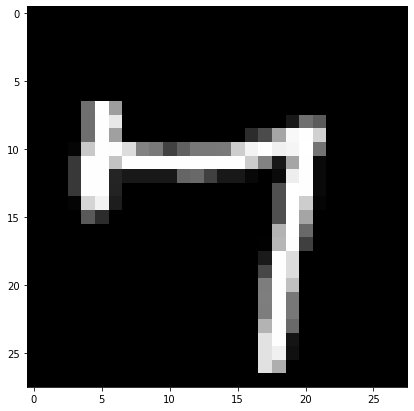

In [8]:
plt.figure(figsize=(7,7))
some_digit=120
some_digit_image = x.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

C:\Users\md.sakib\.conda\envs\bris1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

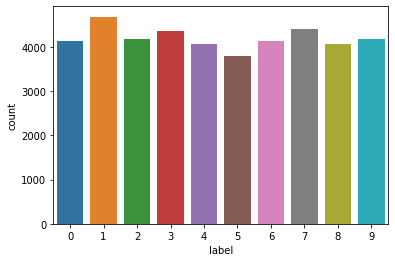

In [9]:
sns.countplot(train_df['label'])

#### we can conclude that our dataset is balanced

# Splitting the train data  into train and test 

In [10]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# **Models**

# KNN

In [11]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [12]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(29400, 784)

# k=5

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = classifier.predict(x_test)
y_pred

C:\Users\md.sakib\.conda\envs\bris1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([8, 1, 9, ..., 5, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8032539682539682
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1200
           1       0.99      0.91      0.95      1389
           2       0.93      0.81      0.87      1294
           3       0.94      0.77      0.85      1355
           4       0.99      0.53      0.69      1222
           5       0.94      0.61      0.74      1085
           6       0.95      0.91      0.93      1256
           7       0.95      0.85      0.90      1359
           8       0.59      0.89      0.71      1209
           9       0.84      0.71      0.77      1231

    accuracy                           0.80     12600
   macro avg       0.86      0.80      0.81     12600
weighted avg       0.87      0.80      0.81     12600

[[1196    0    0    0    0    0    3    0    1    0]
 [  39 1262   15    2    2    0    9    4   54    2]
 [ 177    2 1051   11    0    0    8    2   42    1]
 [ 116    1   24 1049    0   25    1    4  132    3]
 [ 339    

#### **From the classification report, it can be seen that the 5NN  model has an good performance, ranging from precision, recall, f1-score, and support. Accuracy also shows in value of 80.3%.|**

In [16]:
#y_pred_on_test_data = classifier.predict(x_for_test_data)
#y_pred_on_test_data

# SVM

## **Linear Model**

In [17]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=10,random_state = 0) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(x_test)

C:\Users\md.sakib\.conda\envs\bris1\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [18]:
y_pred_svm

array([8, 1, 9, ..., 8, 6, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

0.8111904761904762
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1200
           1       0.96      0.77      0.86      1389
           2       0.93      0.77      0.85      1294
           3       0.73      0.89      0.80      1355
           4       0.84      0.92      0.88      1222
           5       0.97      0.30      0.46      1085
           6       0.92      0.93      0.92      1256
           7       0.97      0.74      0.84      1359
           8       0.51      0.96      0.67      1209
           9       0.84      0.80      0.82      1231

    accuracy                           0.81     12600
   macro avg       0.85      0.81      0.80     12600
weighted avg       0.86      0.81      0.81     12600

[[1176    0    1    2    4    4    3    0   10    0]
 [   2 1074    2    8    1    1    1    2  298    0]
 [  17   17  999   65   29    1   36    5  122    3]
 [  14    3    9 1208    3    3    4    2  104    5]
 [   4    

In [20]:
#y_pred_on_test_data_svm = clf.predict(x_for_test_data)
#y_pred_on_test_data_svm

In [21]:
#print(accuracy_score(y_test, y_pred_on_test_data_svm))

#### **Here using Linear SVM also we are getting accuracy approx 80.5 %**

# Let's try to use Hyperparameter Tuning to Improve Model Performance.

In [22]:
model_params = {
     'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [1,10],
            'kernel': ['rbf','linear'],
            'gamma': [0.3, 0.5, 0.7, 0.9]
        }  
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [7,11,13]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clfgrid =  GridSearchCV(mp['model'], mp['params'], cv=5,n_jobs = -1 ,return_train_score=False)
    clfgrid.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clfgrid.best_score_,
        'best_params': clfgrid.best_params_
    })
    
df_grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_grid

In [ ]:
#Predict the response for test dataset
y_pred_grid = clfgrid.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))

# KNN with best parameters 

# k=7

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

## **7NN-83% accuracy**

# k=23

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 23)
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# **23 NN-83.5% accuracy**

#k=3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# **3 NN-76%**

# SVM with best parameters

# kernel='rbf'

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=10, gamma=0.001)

clf.fit(x_train, y_train)

y_pred_svm = clf.predict(x_test)

In [ ]:
y_pred_svm

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

# Poly

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly')

clf.fit(x_train, y_train)

y_pred_svm = clf.predict(x_test)

In [ ]:
y_pred_svm

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

# SVM-Poly-83.4%

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=1000)
log_classifier.fit(x_train, y_train)

In [ ]:
y_pred_log=log_classifier.predict(x_test)

In [ ]:
y_pred_log

In [ ]:
print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))

# **Logistic Regression-82.6%**

#  Summarize the Model Performance :
Linear SVC : 80.5 % 

SVC rbf : 11 %

SVC poly : 83.4% %

Logistic regression : 82.6 %

3-NN: 76 %

5-NN :80.3%

7-NN: 83%

23-NN: 83.5%
